## Preparing cochlear hair cell count data for analysis

#### Data
MyoVIIa-labeled explants are imaged twice: once at the apical region, and once at the basal region of the coil.

From those images, we manually count the number of outer and inner hair cells within the sampling region.

The data for six untreated cultures might look like this:

| APICAL|cA1|cA2|cA3|cA4|cA5|cA6|cA7|cA8|
|:---  |----|----|----|----|----|----|----|----|
|inner HC |20| 18| 20| 12| 18| 17| 17| 18|
|outer HC |65| 52| 73| 45| 53| 52| 55| 56|
|**CONTROL TOTAL**   |85| 70| 93| 57| 71| 69| 72| 74|

| BASAL|cB1|cB2|cB3|cB4|cB5|cB6|cB7|cB8|
|:---  |----|----|----|----|----|----|----|----|
|inner HC |18| 17| 20| 16| 19| 19| 18| 17|
|outer HC |63| 55| 77| 50| 57| 60| 63| 55|
|**CONTROL TOTAL**   |81| 72| 97| 66| 76| 79| 81| 72|





Let's work with the total number of hair cells (inner HC + outer HC) in the basal coil. 

## Descriptive statistics
We would like to compare two groups: one which has been treated with gentamicin, and an untreated control. 

Our data is stored as rows in a CSV, and looks like this:

            controlT,81,72,97,66,76,79,81,72
            gentT,24,13,10,12,12,27,29,28
### Process
<ol>            
<li>Load packages</li>
<li>Transfer the data from an external file to a dataframe</li>
    <li>Transpose the dataframe</li>

#### Load packages

In [12]:
import pandas as pd               # a library for data manipulation and analysis
import numpy as np                # a library for operating on arrays and matrices
import matplotlib.pyplot as plt   # a matplotlib module used to create plots
import scipy.stats as stats       # a SciPy module containing probability functions and statistical functions
import seaborn as sns             # another plotting library

#### Read the CSV into a dataframe, transpose values

In [105]:
# read the CSV into dataframe df and print
df = pd.read_csv('gent.csv', header=None, index_col=0)      # no header in csv, use the first column as row label
df                                                    

,1,2,3,4,5,6,7,8
0,,,,,,,,
Control,81,72,97,66,76,79,81,72
+ Gentamicin,24,13,10,12,12,27,29,28


In [130]:
# transpose df and print
dfx = df.T    
dfx   

,Control,+ Gentamicin
1,81,24
2,72,13
3,97,10
4,66,12
5,76,12
6,79,27
7,81,29
8,72,28


#### Calculate descriptive statistics

In [131]:
# adjust precision
pd.set_option("display.precision",2)

# calculate column statistics and print
dfx_stats=dfx.describe()
dfx_stats

,Control,+ Gentamicin
count,8.00,8.00
mean,78.00,19.38
std,9.26,8.31
min,66.00,10.00
25%,72.00,12.00
50%,77.50,18.50
75%,81.00,27.25
max,97.00,29.00


We see that the mean of the two groups is quite difference, but that the groups have similar variance.

#### Generate a box-and-whisker plot with an overlying swarmplot

Text(0, 0.5, 'Number of hair cells')

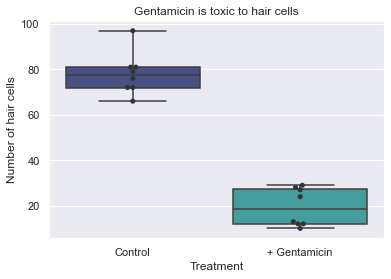

In [132]:
ax = sns.boxplot(data=dfx, whis=np.inf, palette="mako")   # box-and-whisker plot with mako color palette
ax = sns.swarmplot(data=dfx, color=".2")
ax.set_title('Gentamicin is toxic to hair cells')          # x axis title
ax.set_xlabel('Treatment')
ax.set_ylabel('Number of hair cells')                      # y axis title